For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.**

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.

## Import Libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

## Get the Data

** Read in the Data file. Figure out how to set the first column as the index.**

In [95]:
data = pd.read_csv("data.csv")

**Check the head of the data**

In [96]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15



## Data Description

* **Private A factor with levels No and Yes indicating private or public university**
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

**Get the data info**

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

**Get the data description**

In [98]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

**Create a scatterplot of Grad.Rate versus Room Board

the points are colored by the Private column.**

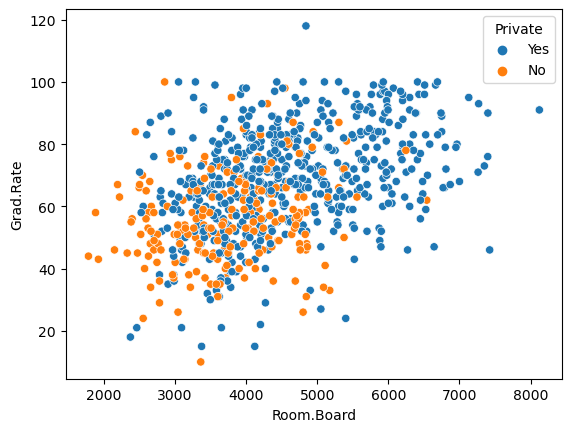

In [99]:
sns.scatterplot(x='Room.Board', y='Grad.Rate', hue='Private', data=data)
plt.show()

**Create a scatterplot of F.Undergrad versus Outstate

where the points are colored by the Private column.**

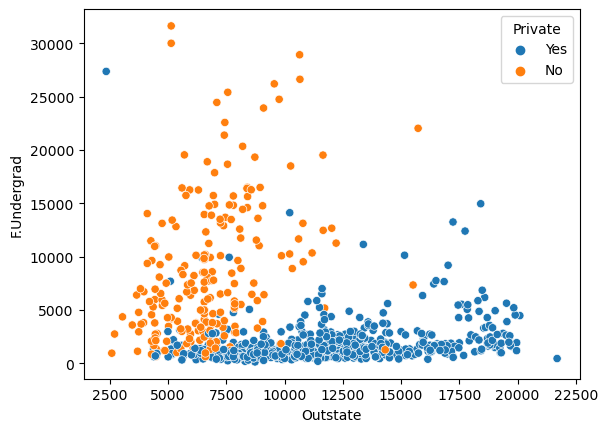

In [100]:
sns.scatterplot(x='Outstate', y='F.Undergrad', hue='Private', data=data)
plt.show()

**Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html).

If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist').**

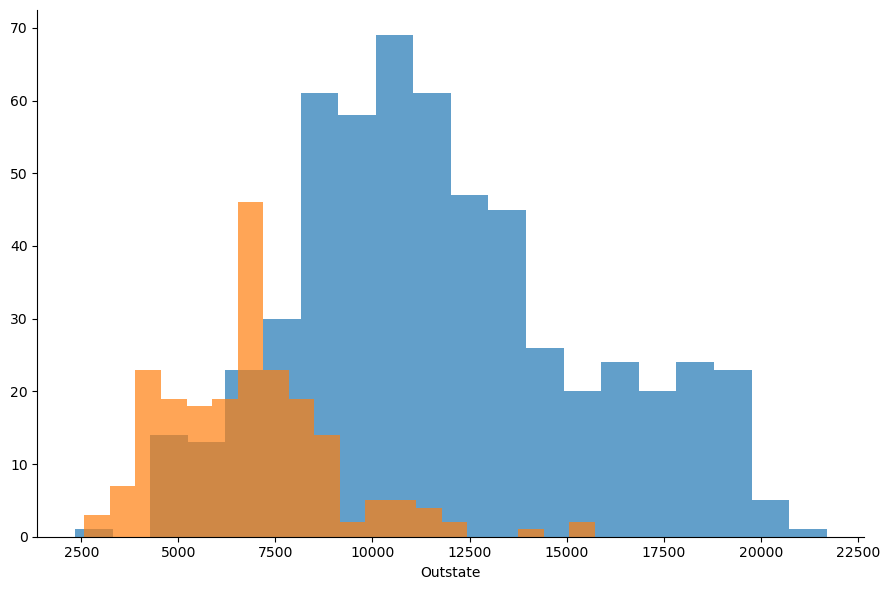

In [101]:
g = sns.FacetGrid(data, hue='Private', height=6, aspect=1.5)
g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)
plt.show()

**Create a similar histogram for the Grad.Rate column.**

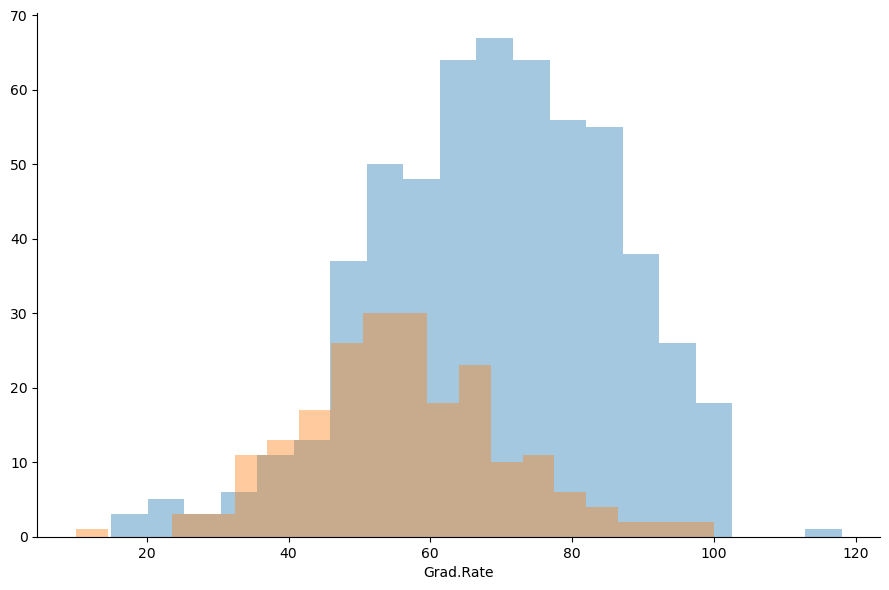

In [102]:
g = sns.FacetGrid(data, hue='Private', height=6, aspect=1.5)
g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.4)
plt.show()

**Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [103]:
print( data[data['Grad.Rate'] > 100])

           Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College     Yes  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
95         1010           12      9384        4840    600       500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
95        47       14.3           20    7697        118  


**Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [104]:
data.loc[data['Unnamed: 0'] == 'Cazenovia College', 'Grad.Rate'] = 100

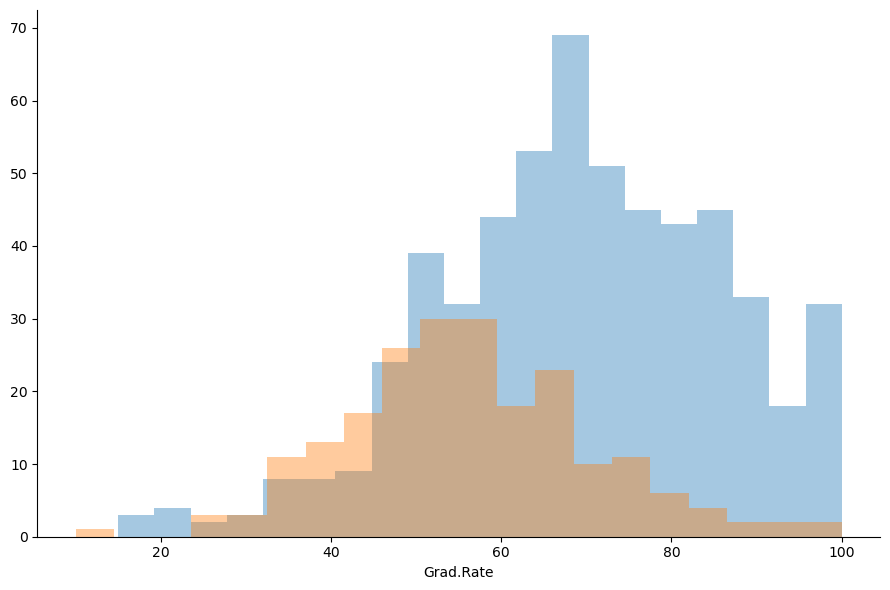

In [105]:
g = sns.FacetGrid(data, hue='Private', height=6, aspect=1.5)
g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.4)
plt.show()

In [106]:
print(data['Unnamed: 0'].value_counts())

Abilene Christian University        1
Southern Methodist University       1
Sarah Lawrence College              1
Savannah Coll. of Art and Design    1
Schreiner College                   1
                                   ..
Huntingdon College                  1
Huntington College                  1
Huron University                    1
Husson College                      1
York College of Pennsylvania        1
Name: Unnamed: 0, Length: 777, dtype: int64


-------

In [107]:
modified_data = data.drop(['Unnamed: 0'], axis = 1)

In [108]:
modified_data.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [109]:
modified_data = modified_data.drop(['Private'], axis = 1)

In [110]:
modified_data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [111]:
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


In [112]:
scaler = StandardScaler()
modified_data = scaler.fit_transform(modified_data)

In [113]:
modified_data

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.17992933e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51804628e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.68710475e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.60975094e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.96167109e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.96167109e+00]])

## K Means Clustering

**Apply Elbow Method to determine the best number of clusters**

**Also show me a graph of the elbow method**

In [114]:
wcss = []
k_range = range(1,10)
for i in k_range:
    kmeans_model = KMeans(n_clusters = i)
    kmeans_model.fit(modified_data)
    wcss.append(kmeans_model.inertia_)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

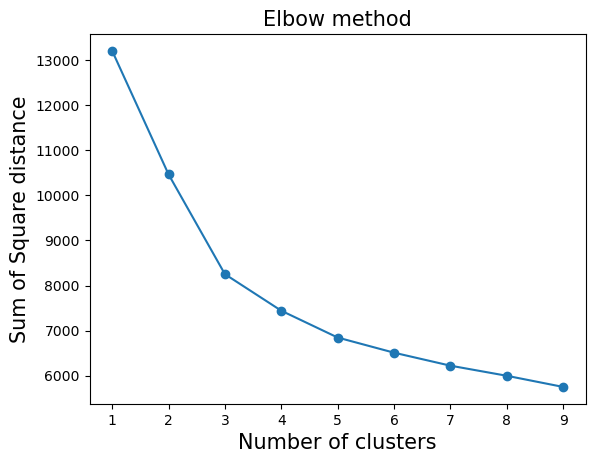

In [115]:
plt.plot(k_range, wcss, marker = 'o')
plt.title("Elbow method", fontsize = 15)
plt.xlabel("Number of clusters", fontsize= 15)
plt.ylabel("Sum of Square distance", fontsize = 15)
plt.show()

**Also show the silhoutte score**

In [116]:
s = []
sil_score =[]
k_range = range(2,10)
for i in k_range:
    kmeans_model = KMeans(n_clusters = i, random_state = 42)
    y_pred = kmeans_model.fit_predict(modified_data)
    s.append(kmeans_model.inertia_)
    sil_score.append(silhouette_score(modified_data, y_pred))
    
    print(" k = ", i, ':', kmeans_model.inertia_)
    print("siloutte score: %0.3f" % silhouette_score(modified_data, y_pred))

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 k =  2 : 10467.616632653844
siloutte score: 0.229


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 k =  3 : 8251.891550199643
siloutte score: 0.242


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 k =  4 : 7440.188193210506
siloutte score: 0.182


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 k =  5 : 6844.752782037493
siloutte score: 0.183


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 k =  6 : 6507.040720973431
siloutte score: 0.162


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 k =  7 : 6216.248814196443
siloutte score: 0.144


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 k =  8 : 5979.359019960222
siloutte score: 0.141


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 k =  9 : 5755.792547790299
siloutte score: 0.144


**Fit the KMeans model with the best number of clusters**

In [117]:
kmeans_model = KMeans(n_clusters = 3, random_state = 42)
y_pred = kmeans_model.fit_predict(modified_data)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**print the clusters center**

In [118]:
kmeans_model.cluster_centers_

array([[-0.37121158, -0.36101357, -0.33696673, -0.5295144 , -0.55519495,
        -0.31185023, -0.12785759, -0.47491443, -0.3670614 , -0.10248925,
         0.03788793, -0.56081008, -0.55751843,  0.23271392, -0.33255606,
        -0.44007987, -0.35629428],
       [-0.03491912, -0.11663877, -0.23321938,  0.85584974,  0.83757607,
        -0.30207524, -0.36957759,  1.04868266,  0.71768809,  0.05906132,
        -0.37449144,  0.73753847,  0.73607726, -0.6354434 ,  0.8170256 ,
         0.80568529,  0.77194024],
       [ 1.8406535 ,  2.0087858 ,  2.20390747,  0.22998143,  0.39926533,
         2.26775172,  1.57976036, -0.53724098, -0.16966   ,  0.3264646 ,
         0.81215031,  0.69032634,  0.67868889,  0.5848428 , -0.59493273,
        -0.05853333, -0.36387534]])

**Print your prediction**

In [119]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0,
       0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

**Provide me with one or more scatter plot showing the clusters**

In [120]:
modified_data = pd.DataFrame(modified_data)
modified_data.rename(columns = {0:'Apps', 1 :'Accept', 2: 'Enroll',
                              3: 'Top10perc', 4 : 'Top25perc',
                              5:'F.Undergrad', 6: 'P.Undergrad',
                              7: 'Outstate', 8: 'Room.Board',
                      9: 'Books', 10: 'Personal',
                      11: 'PhD', 12: 'Terminal',
                      13: 'S.F.Ratio', 14: 'perc.alumni',
                      15: 'Expend', 16: 'Grad.Rate'},inplace = True)
modified_data['cluster'] = y_pred
df1 = modified_data[modified_data.cluster == 0]
df2 = modified_data[modified_data.cluster == 1]
df3 = modified_data[modified_data.cluster == 2]

In [121]:
df1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.317993,0
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551805,0
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.668710,0
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.948375,0
5,-0.624307,-0.628611,-0.669812,0.592287,0.313426,-0.623421,-0.535212,0.760947,-0.932970,-0.299280,-0.983753,-0.346878,-0.455567,-1.185526,-0.948325,0.012806,-0.610258,0


In [122]:
df2.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376446,1
6,-0.684808,-0.685356,-0.729043,-0.598931,-0.545505,-0.677472,-0.410988,0.708713,1.243144,-0.299280,0.235515,1.062639,0.903786,-0.654660,0.262933,-0.153145,-0.142634,1
7,-0.285088,-0.121984,-0.313353,0.535563,0.616579,-0.434450,-0.541127,0.852479,0.427443,-0.602312,-0.725120,1.001356,1.379560,-0.098515,1.151188,0.350074,0.441895,1
8,-0.507700,-0.481644,-0.595505,0.138490,0.363952,-0.562562,-0.361036,1.282036,0.038754,-1.511408,-1.242385,0.388522,0.292077,-0.705218,0.020681,0.380160,0.851066,1
10,-0.328266,-0.242415,-0.331661,0.535563,0.970257,-0.385763,-0.489860,1.519075,0.956645,-0.299280,-1.094595,0.572372,0.563948,-0.705218,0.666685,0.243720,0.441895,1


In [123]:
df3.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
21,1.114706,1.079876,1.216943,-0.428757,0.363952,1.287334,0.118112,-0.904051,-1.658341,-2.747779,0.974465,0.633656,1.107689,1.064335,-0.706073,-0.729374,0.266536,2
23,2.535702,3.383986,3.210314,-0.201858,-0.343404,3.897654,4.423210,-0.747848,0.449341,0.912848,1.122255,0.940072,0.903786,1.216011,-1.432828,-0.969294,-1.019428,2
27,1.175466,1.948204,2.466165,-0.145133,0.060800,2.591566,0.565711,-1.029908,-0.387345,0.306784,0.838498,0.756222,0.767851,0.659865,-0.383071,-0.578370,0.208083,2
39,0.794620,1.359521,1.709094,0.365389,0.515528,1.283002,-0.244042,-0.992598,-0.399206,0.306784,0.007918,-0.101745,-0.251664,1.114893,1.231939,-0.413377,0.383442,2
59,4.444584,4.485827,3.263083,0.989360,1.222884,2.325232,1.483912,1.984697,2.237678,-0.450796,-0.466488,0.449806,0.088174,-0.553542,-0.544572,1.375099,0.383442,2


Text(0, 0.5, 'Grad.Rate')

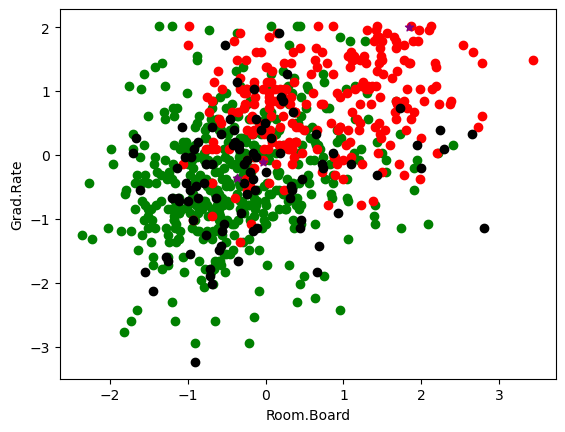

In [124]:
plt.scatter(df1['Room.Board'], df1['Grad.Rate'], color = 'green')
plt.scatter(df2['Room.Board'], df2['Grad.Rate'], color = 'red')
plt.scatter(df3['Room.Board'], df3['Grad.Rate'], color = 'black')
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1], color = 'purple', marker = "*", label = 'centroid' )
plt.xlabel("Room.Board")
plt.ylabel("Grad.Rate")

Text(0, 0.5, 'F.Undergrad')

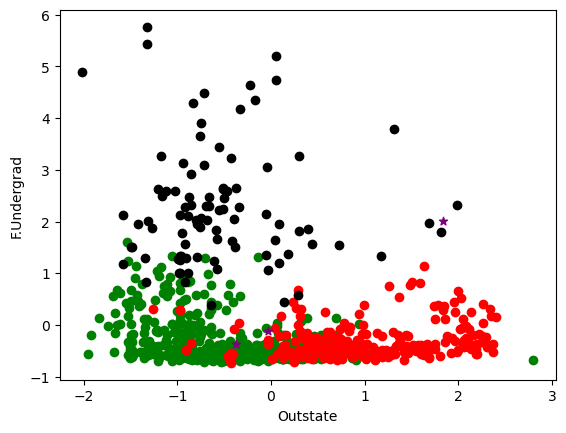

In [125]:
plt.scatter(df1['Outstate'], df1['F.Undergrad'], color = 'green')
plt.scatter(df2['Outstate'], df2['F.Undergrad'], color = 'red')
plt.scatter(df3['Outstate'], df3['F.Undergrad'], color = 'black')
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1], color = 'purple', marker = "*", label = 'centroid' )
plt.xlabel("Outstate")
plt.ylabel("F.Undergrad")

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [126]:
data['New_cluster'] = data['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

**Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [128]:
print(confusion_matrix(data['New_cluster'], y_pred))

[[122   8  82]
 [316 238  11]
 [  0   0   0]]


In [129]:
print(classification_report(data['New_cluster'], y_pred))

              precision    recall  f1-score   support

           0       0.28      0.58      0.38       212
           1       0.97      0.42      0.59       565
           2       0.00      0.00      0.00         0

    accuracy                           0.46       777
   macro avg       0.42      0.33      0.32       777
weighted avg       0.78      0.46      0.53       777



C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[138,  74],
       [531,  34]], dtype=int64)

Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!

## Great Job!